# PROJECT TITLE : EXPLORING BOX OFFICE TRENDS

![Movie Update](Movie_Update.jpg)

# PROJECT OVERVIEW
Goal:
Identify the types of films performing best in the box office and understand the factors influencing their success.

Analysis:
Used Python to merge and clean multiple movie datasets, calculate profit and ROI, and run visualizations and statistical tests to uncover what drives box office success.

Deliverable:
Provide insights on the most profitable genres, budgets, and release timings to guide future video content production and help producers make data-driven decisions for maximizing box office returns.


# PROBLEM STATEMENT
Movie production is risky, with no guarantee of profitability. Without data-driven insights, producers and investors face uncertainty when deciding what films to make.

This project analyses which genres, budgets, and release periods are most linked to strong returns on investment, helping stakeholders make smarter, lower-risk decisions in a competitive industry.


# BUSINESS UNDERSTANDING

The demand for original video content is growing rapidly, with major studios competing for audience attention

Our company plans to launch a new movie studio to enter this market, but success depends on understanding what types of films perform well

This project analyses historical movie data to uncover key characteristics of successful films and provide actionable insights to guide production strategy
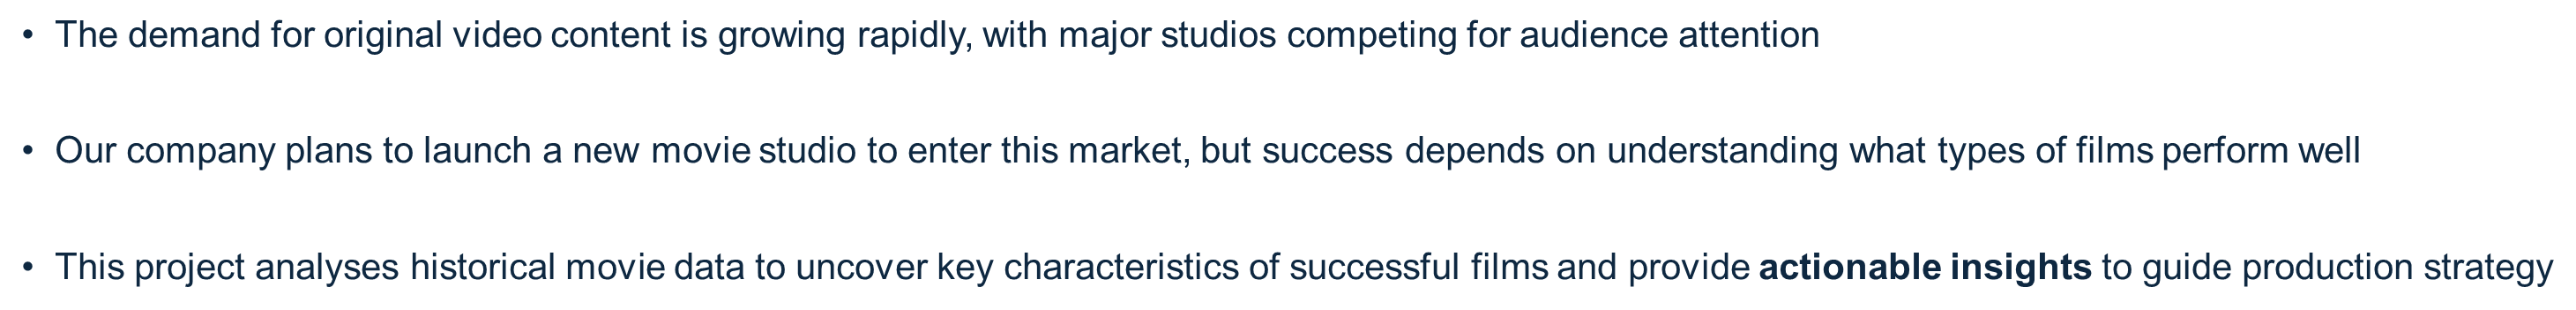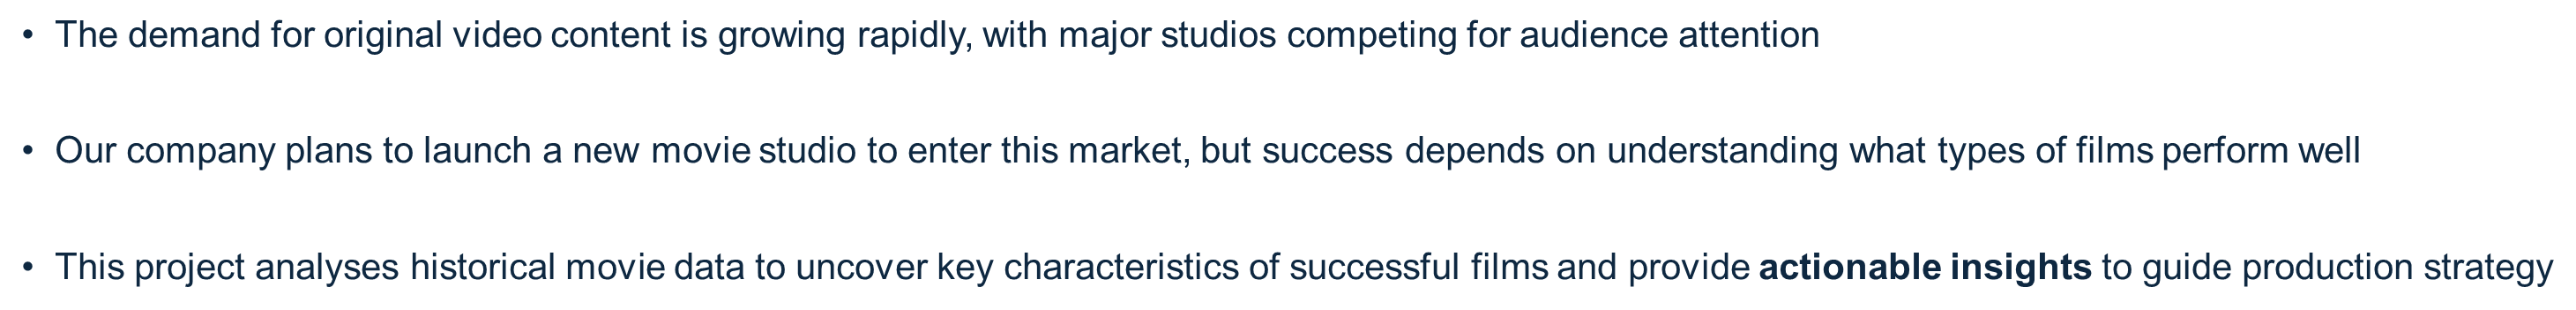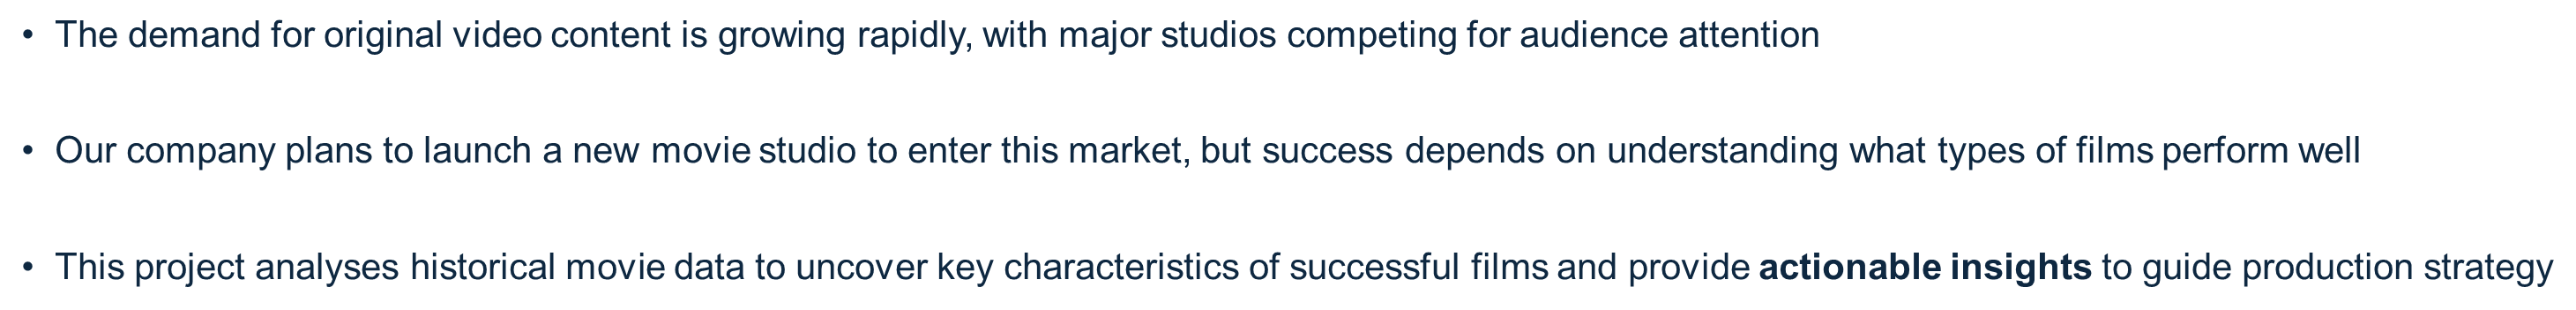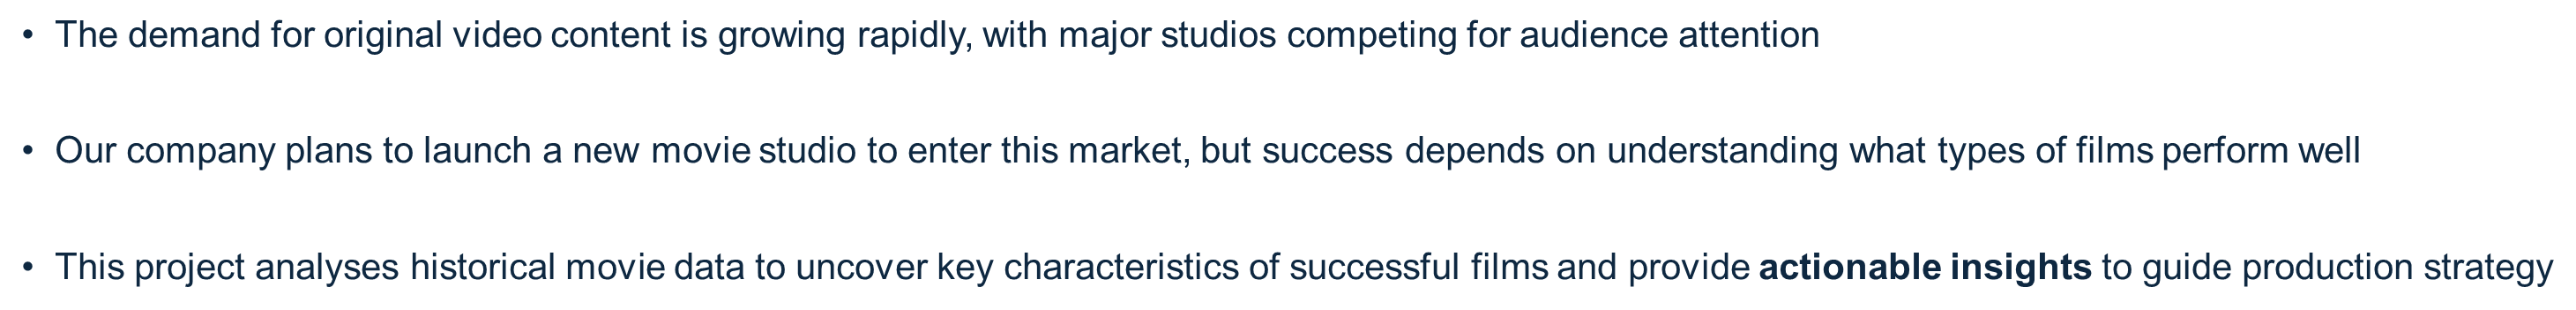

# DATA UNDERSTANDING

Datasets Used and Data used:
IMDb (SQL database): rating, genre and runtime
Box Office Mojo csv: domestic revenue and foreign revenue
The numbers csv: production budget
The Movie Db csv: popularity score, release date

Challenges:
The budget wasn’t available for all films
No universal movie identification index


# OBJECTIVES

1. Identify the most profitable movie genres based on ROI.

2. Determine the best release months for high-performing films.

3. Analyse the impact of the production budget on movie profitability.

4. Recommend strategies for maximising ROI in future film productions.


In [1]:
import pandas as pd
import sqlite3

In [2]:
# Open up a connection
conn = sqlite3.connect("zippedData/im.db")
# Initialize a cursor
cur = conn.cursor()

cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [3]:
from IPython.display import display, HTML

movie_basics = pd.read_sql("""
SELECT * FROM movie_basics
""", conn).head(2)

print()
display(HTML("<b>Movie basics table \n</b>"))
print(movie_basics) 

#Directors table
directors = pd.read_sql("""
SELECT * FROM directors
""", conn).head(2)
display(HTML("<b>\n \n Directors table</b>"))
print(directors)

known_for = pd.read_sql("""
SELECT * FROM known_for
""", conn).head(2)
display(HTML("<b>\n \n Known_for table</b>"))

print(known_for) 

movie_akas = pd.read_sql("""
SELECT * FROM movie_akas
""", conn).head(2)
display(HTML("<b>\n \n Movie_akas table</b>"))
print(movie_akas) 

movie_ratings = pd.read_sql("""
SELECT * FROM movie_ratings
""", conn).head(2)
display(HTML("<b>\n \n Movie_ratings table</b>"))
print(movie_ratings) 

persons = pd.read_sql("""
SELECT * FROM persons
""", conn).head(2)
display(HTML("<b>\n \n Persons table</b>"))
print(persons)

principals = pd.read_sql("""
SELECT * FROM principals
""", conn).head(2)
display(HTML("<b>\n \n Principals table</b>"))
print(principals)

writers = pd.read_sql("""
SELECT * FROM writers
""", conn).head(2)
display(HTML("<b>\n \n Writers table</b>"))
print(writers)

    movie_id                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes              genres  
0            175.0  Action,Crime,Drama  
1            114.0     Biography,Drama  


    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585


   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241


    movie_id  ordering              title region language        types  \
0  tt0369610        10      Джурасик свят     BG       bg         None   
1  tt0369610        11  Jurashikku warudo     JP     None  imdbDisplay   

  attributes  is_original_title  
0       None                0.0  
1       None                0.0  


     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559


   person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   

                           primary_profession  
0   miscellaneous,production_manager,producer  
1  composer,music_department,sound_department  


    movie_id  ordering  person_id  category   job   characters
0  tt0111414         1  nm0246005     actor  None  ["The Man"]
1  tt0111414         2  nm0398271  director  None         None


    movie_id  person_id
0  tt0285252  nm0899854
1  tt0438973  nm0175726


In [4]:
# Read all csv/tsv files and create dataframes
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='latin1')
tmbd_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

print("Movie gross info:")
movie_gross.info()


from IPython.display import HTML, display

display(HTML("\ <b>Movie_gross head</b>"))
display(movie_gross.head(2))

Movie gross info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [5]:
# 1) Print info cleanly
print("Movie_info info:")
movie_info.info()

display(HTML("<b>Movie_info head</b>"))
display(movie_info.head(2))

Movie_info info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [6]:
print("Reviews info:")
reviews.info()

display(HTML("<b>reviews head</b>"))
display(reviews.head(2))


Reviews info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [7]:
display(HTML("<b>TMDB Movie info:</b>"))

tmbd_movies.info()

display(HTML("<b>TMDB MOVIES head</b>"))
display(tmbd_movies.head(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [8]:
display(HTML("<b>Movie Budget info:</b>"))
movie_budgets.info()

display(HTML("<b>Movie Budget head</b>"))
display(movie_budgets.head(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


# DATA CLEANING

In [9]:
# Analyzing the tables and load data into a pandas DataFrame
query1 = pd.read_sql_query( "SELECT * FROM movie_ratings", conn)
query2 = pd.read_sql_query("SELECT * FROM movie_basics" , conn)
display(HTML("<b>Movie Ratings table</b>"))
print(query1.head(2))

display(HTML("<b>Movie Basics table</b>"))
print(query2.head(2))



sql_dataset = pd.read_sql_query(
    """
SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title,
    mb.genres,
    mb.start_year,
    mr.averagerating,
    mr.numvotes,
    mb.runtime_minutes
FROM 
    movie_basics AS mb
LEFT JOIN 
    movie_ratings AS mr
ON 
    mb.movie_id = mr.movie_id;
    """, conn)

display(HTML("<b>Joined Tables</b>"))
print(sql_dataset.head(2))

display(HTML("<b>SQL dataset.info</b>"))
sql_dataset.info()

# Drop null values
sql_dataset.dropna(inplace = True)
display(HTML("<b>Clean SQL dataset.info</b>"))
sql_dataset.info()

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559


    movie_id                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes              genres  
0            175.0  Action,Crime,Drama  
1            114.0     Biography,Drama  


    movie_id   original_title                    primary_title  \
0  tt0063540        Sunghursh                        Sunghursh   
1  tt0066787  Ashad Ka Ek Din  One Day Before the Rainy Season   

               genres  start_year  averagerating  numvotes  runtime_minutes  
0  Action,Crime,Drama        2013            7.0      77.0            175.0  
1     Biography,Drama        2019            7.2      43.0            114.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   primary_title    146144 non-null  object 
 3   genres           140736 non-null  object 
 4   start_year       146144 non-null  int64  
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
 7   runtime_minutes  114405 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   original_title   65720 non-null  object 
 2   primary_title    65720 non-null  object 
 3   genres           65720 non-null  object 
 4   start_year       65720 non-null  int64  
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  float64
 7   runtime_minutes  65720 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.5+ MB


In [10]:
display(HTML("<b>Movie gross.info</b>"))
movie_gross.info()

# Select specific columns from sql_dataset
sql_subset = sql_dataset[['primary_title', 'start_year','genres', 'averagerating', 'numvotes','runtime_minutes']].copy()

# Clean title columns to avoid mismatches
sql_subset['clean_title'] = sql_subset['primary_title'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.strip()
movie_gross['clean_title'] = movie_gross['title'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.strip()

# Merge the datasets
merged = pd.merge(movie_gross, sql_subset, on='clean_title', how='inner')
display(HTML("<b>Merged database</b>"))
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 0 to 3151
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3152 non-null   object 
 1   studio           3149 non-null   object 
 2   domestic_gross   3129 non-null   float64
 3   foreign_gross    1891 non-null   object 
 4   year             3152 non-null   int64  
 5   clean_title      3152 non-null   object 
 6   primary_title    3152 non-null   object 
 7   start_year       3152 non-null   int64  
 8   genres           3152 non-null   object 
 9   averagerating    3152 non-null   float64
 10  numvotes         3152 non-null   float64
 11  runtime_minutes  3152 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 320.1+ KB


In [11]:
display(HTML("<b>Movie Budget.info</b>"))
movie_budgets.info()

# Clean title column first
movie_budgets['clean_title'] = movie_budgets['movie'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.strip()

# Then select needed columns including clean_title
moviebudget_subset = movie_budgets[['clean_title', 'production_budget']].copy()

# Merge
merged_budget = pd.merge(merged, moviebudget_subset, on='clean_title', how='inner')
display(HTML("<b>Merged_budget.info</b>"))
merged_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1502 non-null   object 
 1   studio             1502 non-null   object 
 2   domestic_gross     1501 non-null   float64
 3   foreign_gross      1288 non-null   object 
 4   year               1502 non-null   int64  
 5   clean_title        1502 non-null   object 
 6   primary_title      1502 non-null   object 
 7   start_year         1502 non-null   int64  
 8   genres             1502 non-null   object 
 9   averagerating      1502 non-null   float64
 10  numvotes           1502 non-null   float64
 11  runtime_minutes    1502 non-null   float64
 12  production_budget  1502 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 164.3+ KB


In [12]:
display(HTML("<b>TMBD movies.info</b>"))
tmbd_movies.info()
# Clean title column first
tmbd_movies['clean_title'] = tmbd_movies['title'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.strip()

# Then select needed columns including clean_title
tmbd_movies_subset = tmbd_movies[['clean_title', 'popularity', 'release_date']].copy()

# Merge
merged_budget_tmdb = pd.merge(merged_budget, tmbd_movies_subset, on='clean_title', how='inner')
display(HTML("<b>merged_budget_tmdb.info</b>"))
merged_budget_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1930 non-null   object 
 1   studio             1930 non-null   object 
 2   domestic_gross     1929 non-null   float64
 3   foreign_gross      1625 non-null   object 
 4   year               1930 non-null   int64  
 5   clean_title        1930 non-null   object 
 6   primary_title      1930 non-null   object 
 7   start_year         1930 non-null   int64  
 8   genres             1930 non-null   object 
 9   averagerating      1930 non-null   float64
 10  numvotes           1930 non-null   float64
 11  runtime_minutes    1930 non-null   float64
 12  production_budget  1930 non-null   object 
 13  popularity         1930 non-null   float64
 14  release_date       1930 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 241.2+ KB


In [13]:
final_dataset=merged_budget_tmdb
final_dataset.head()

,title,studio,domestic_gross,foreign_gross,year,clean_title,primary_title,start_year,genres,averagerating,numvotes,runtime_minutes,production_budget,popularity,release_date
0,Toy Story 3,BV,415000000.0,652000000,2010,toy story 3,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218.0,103.0,"$200,000,000",24.445,2010-06-17
1,Inception,WB,292600000.0,535700000,2010,inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0,148.0,"$160,000,000",27.920,2010-07-16
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,shrek forever after,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,167532.0,93.0,"$165,000,000",15.041,2010-05-16
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,the twilight saga eclipse,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,211733.0,124.0,"$68,000,000",20.340,2010-06-23
4,Iron Man 2,Par.,312400000.0,311500000,2010,iron man 2,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690.0,124.0,"$170,000,000",28.515,2010-05-07


In [14]:

#Foreign gross column is object and it's supposed to be float
final_dataset['foreign_gross'] = pd.to_numeric(final_dataset['foreign_gross'], errors='coerce')
final_dataset['foreign_gross'].fillna(0, inplace=True)

#Filling null values in domestic gross
final_dataset['domestic_gross'].fillna(0, inplace=True)
# Cleaning the production budget column.Remove dollar signs and commas, then convert to float
final_dataset['production_budget'] = final_dataset['production_budget'].replace('[\$,]', '', regex=True).astype(float)

display(HTML("<b>Duplicates</b>"))
final_dataset.duplicated().sum()


175

### DUPLICATES

In [15]:
# Check and display the number of duplicates based on 'clean_title'
duplicate_count = final_dataset.duplicated(subset='clean_title').sum()
print(f"Number of duplicate rows (based on 'clean_title') before dropping: {duplicate_count}")

# Drop duplicates based on 'clean_title'
final_dataset = merged_budget_tmdb.drop_duplicates(subset='clean_title')

# Confirm removal by checking info and counting duplicates again
print("\n Data info after dropping duplicates:")
final_dataset.info()

# Final check to ensure duplicates are removed
final_duplicates = final_dataset.duplicated(subset='clean_title').sum()
print(f"\nNumber of duplicate rows (based on 'clean_title') after dropping: {final_duplicates}")


Number of duplicate rows (based on 'clean_title') before dropping: 686

 Data info after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1928
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1244 non-null   object 
 1   studio             1244 non-null   object 
 2   domestic_gross     1244 non-null   float64
 3   foreign_gross      1244 non-null   float64
 4   year               1244 non-null   int64  
 5   clean_title        1244 non-null   object 
 6   primary_title      1244 non-null   object 
 7   start_year         1244 non-null   int64  
 8   genres             1244 non-null   object 
 9   averagerating      1244 non-null   float64
 10  numvotes           1244 non-null   float64
 11  runtime_minutes    1244 non-null   float64
 12  production_budget  1244 non-null   float64
 13  popularity         1244 non-null   float64
 14  release_da

In [16]:

final_dataset = final_dataset.copy()

# Convert release_date to datetime and extract month name
final_dataset['release_date'] = pd.to_datetime(
    final_dataset['release_date'],
    errors='coerce'  # handles invalid dates by converting to NaT
)

final_dataset['release_month_name'] = final_dataset['release_date'].dt.month_name()

# Drop unnecessary columns
final_dataset.drop(
    columns=['primary_title', 'title', 'release_date'],
    inplace=True,
    errors='ignore'  # prevents error if columns don't exist
)

# Verify the changes
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1928
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studio              1244 non-null   object 
 1   domestic_gross      1244 non-null   float64
 2   foreign_gross       1244 non-null   float64
 3   year                1244 non-null   int64  
 4   clean_title         1244 non-null   object 
 5   start_year          1244 non-null   int64  
 6   genres              1244 non-null   object 
 7   averagerating       1244 non-null   float64
 8   numvotes            1244 non-null   float64
 9   runtime_minutes     1244 non-null   float64
 10  production_budget   1244 non-null   float64
 11  popularity          1244 non-null   float64
 12  release_month_name  1244 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 136.1+ KB


## Feature engineering

In [17]:
# Create an explicit copy to modify
final_dataset = final_dataset.copy()

# Now safely add new columns
final_dataset['roi'] = (final_dataset['foreign_gross'] - final_dataset['production_budget']) / final_dataset['production_budget']
final_dataset['profit'] = final_dataset['foreign_gross'] - final_dataset['production_budget']

In [18]:
final_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1928
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studio              1244 non-null   object 
 1   domestic_gross      1244 non-null   float64
 2   foreign_gross       1244 non-null   float64
 3   year                1244 non-null   int64  
 4   clean_title         1244 non-null   object 
 5   start_year          1244 non-null   int64  
 6   genres              1244 non-null   object 
 7   averagerating       1244 non-null   float64
 8   numvotes            1244 non-null   float64
 9   runtime_minutes     1244 non-null   float64
 10  production_budget   1244 non-null   float64
 11  popularity          1244 non-null   float64
 12  release_month_name  1244 non-null   object 
 13  roi                 1244 non-null   float64
 14  profit              1244 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 155.5+

# EXPLORATORY DATA ANALYSIS

In [19]:
# Import libraries for visualisation and analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Note:** The dataset contains movies with multiple genres (e.g. "Action,Adventure"). To allow us to analyse each genre in isolation, we have used the variable genre_split to split these movies into individual rows per genre using .str.split(',') and .explode().

In [20]:
# Split the multigenre films by each individual column
genre_split = final_dataset.assign(genres=final_dataset['genres'].str.split(',')).explode('genres')

# Displaying some examples of what has occured
genre_split.loc[:,['clean_title', 'genres']].head(10)

,clean_title,genres
0,toy story 3,Adventure
0,toy story 3,Animation
0,toy story 3,Comedy
1,inception,Action
1,inception,Adventure
1,inception,Sci-Fi
2,shrek forever after,Adventure
2,shrek forever after,Animation
2,shrek forever after,Comedy
3,the twilight saga eclipse,Adventure


## Movie Popularity by Genre

Here we analyse the distribution of popularity scores of each genre of film. This is helpful as we can understand the general trend of viewership for each genre. This could help identify which type of film most consumers have naturally gravitated to in the past as well as which types of films didn't generate that same level of mainstream interest.

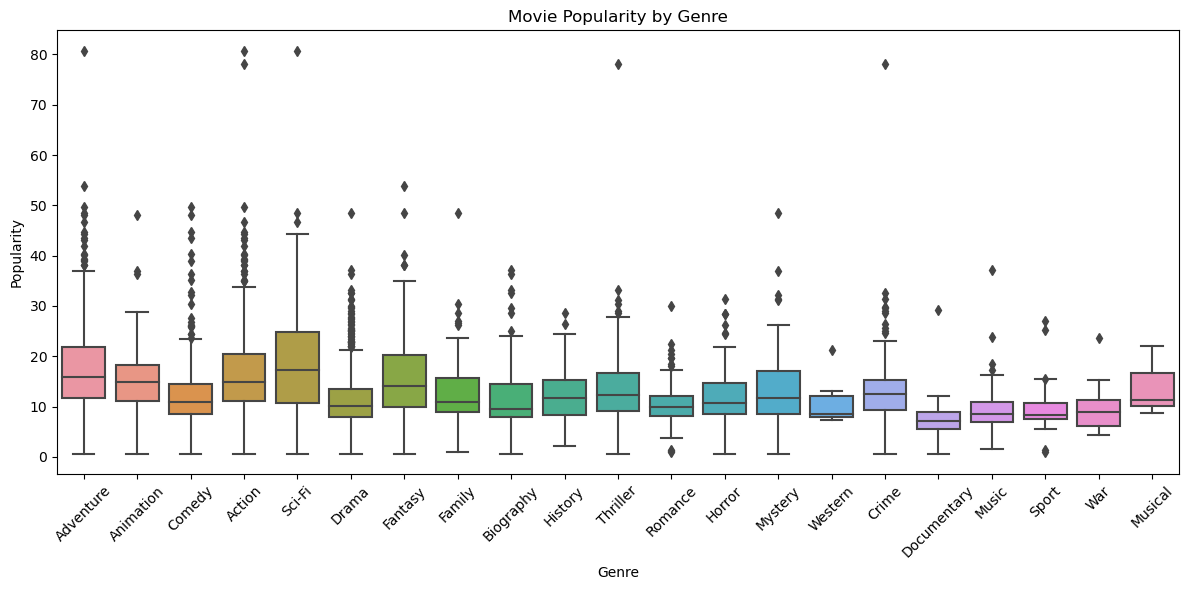

In [21]:
# Plot a boxplot    
plt.figure(figsize=(12, 6))
sns.boxplot(data=genre_split, x='genres', y='popularity')
plt.xticks(rotation=45)
plt.title('Movie Popularity by Genre')
plt.xlabel('Genre') 
plt.ylabel('Popularity')
plt.tight_layout()
plt.show();

**Findings**

Adventure, Action, and Sci-Fi emerged as the most popular genres based on:  
- Higher median popularity scores
- A wide spread of values, indicating a high number of popular titles
- Presence of outliers representing blockbuster hits

Other genres showed:  
- Lower median popularity
- Narrower popularity ranges, indicating niche appeal or limited audience reach

## Average Rating by Genre

Here we analyse the mean 'averagerating' of each genre of film. This is helpful as it can help us ascertain which genre of films consumers are enjoying the most (and least). This could help identify a type of film that market could be in demand for, based on past experiences.

In [23]:
# Average Rating by Genre
avg_rtg_by_genre = genre_split.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
avg_rtg_by_genre

genres
History        7.132432
Biography      7.033613
Documentary    6.952381
Drama          6.664263
Sport          6.662500
Sci-Fi         6.639815
Musical        6.633333
Western        6.600000
Animation      6.591398
Adventure      6.524342
Crime          6.489175
War            6.485714
Action         6.459786
Music          6.404878
Romance        6.398295
Comedy         6.322101
Mystery        6.256481
Fantasy        6.224771
Thriller       6.204306
Family         6.086301
Horror         5.774219
Name: averagerating, dtype: float64

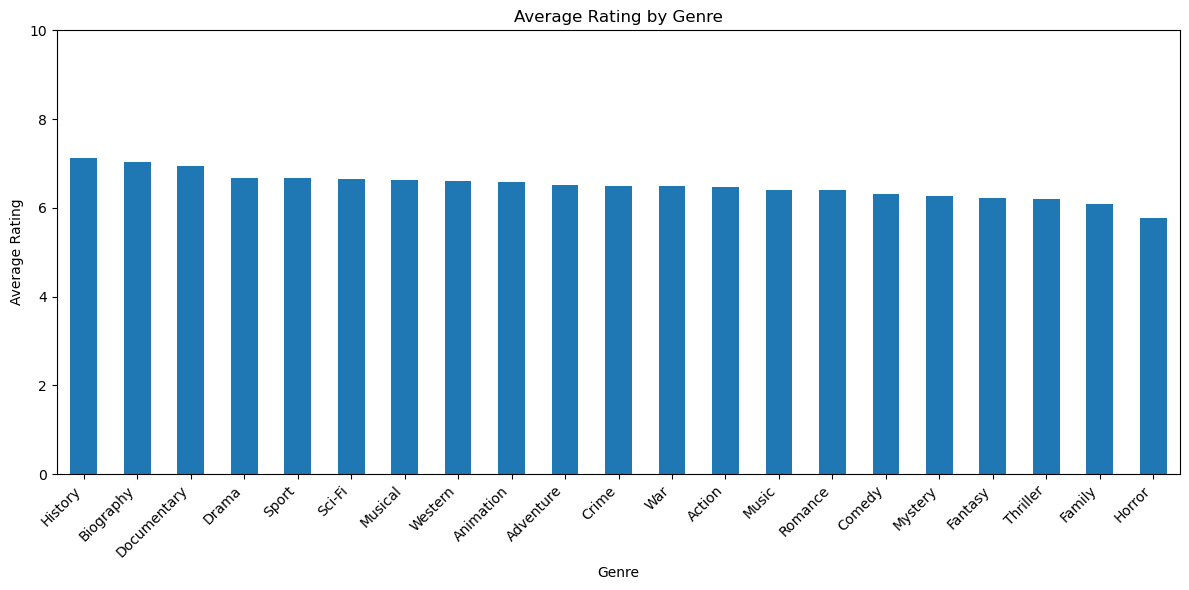

In [24]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
avg_rtg_by_genre.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

### Findings

History, Documentary, and Biography emerged as the highest-rated genres based on:  
- Higher average audience ratings (all above 6.9)
- A clear lead over other genres in average rating, suggesting stronger overall audience appreciation

Other genres showed:  
- Lower average ratings
- Smaller separation between mean scores, making it harder to identify standout performers

## Average ROI by Genre

Next we analyse the average return on investment for each genre of film. This is helpful as we can identify with types of films commercially rewarding investors the most relative to the level of investment.

In [25]:
# Group by genre and calculate average ROI
avg_roi_by_genre = genre_split.groupby('genres')['roi'].mean().sort_values(ascending=False)
avg_roi_by_genre

genres
Horror         5.052442
Mystery        4.959951
Thriller       3.049005
Animation      1.352319
Sci-Fi         1.119079
Music          1.023032
Adventure      0.952385
Biography      0.854753
History        0.836139
Sport          0.833461
Action         0.692122
Romance        0.663346
Comedy         0.626354
Fantasy        0.532128
Drama          0.525392
Documentary    0.479759
Musical        0.437684
Family         0.238560
Crime          0.083375
Western       -0.276210
War           -0.332569
Name: roi, dtype: float64

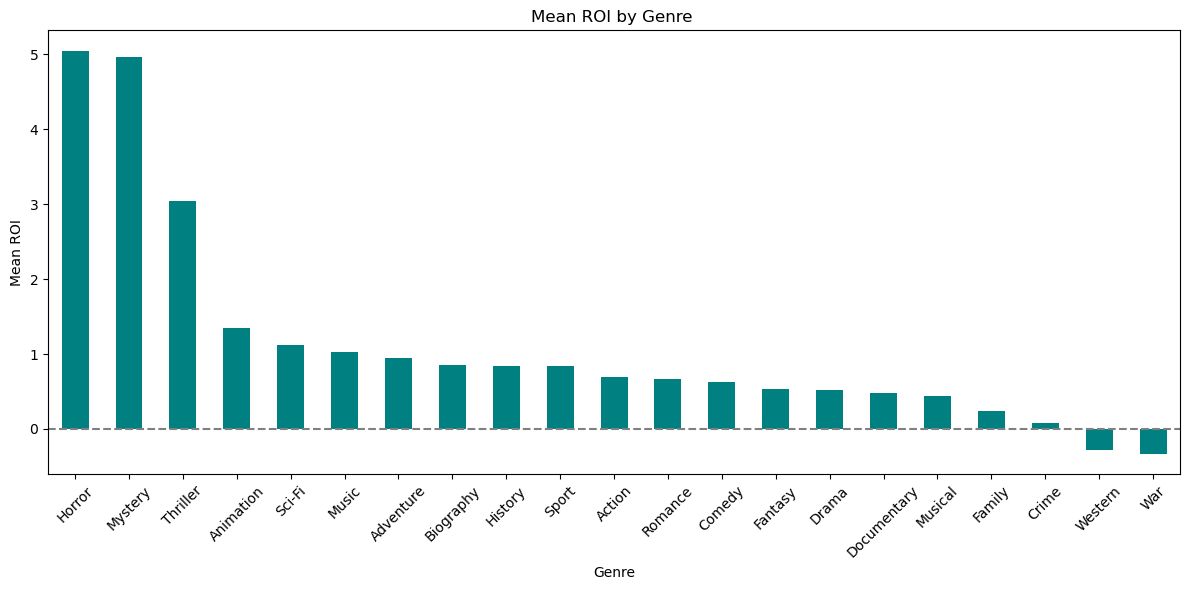

In [26]:
# Plot a bar chart
avg_roi_by_genre.plot(kind='bar', figsize=(12, 6), title= "Mean ROI by Genre ", color='teal')
plt.ylabel("Mean ROI")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')
plt.tight_layout()
plt.show();

**Findings**:

Horror, Mystery and Thriller emerged as the most profitable genres based on:

- Relatively high ROI rates with all having an average of above 3.0
- A clear lead over other genres in average ROI, suggesting consistent ability to maximise on investment

Other genres showed:

- Low average ROI rates
- Suggests struggles to maintain low production costs on these genres
- May also suggest struggles to attract mainstream commercial interest

## Median ROI By Budget Group

Here we analyse the median return on investment based on the budget of the film. This is helpful as we can see how the budget relates to the commercial success of a film. This can help inform stakeholders on ideal budgets to aim for so they can feel comfortable with the investment.

In [27]:
# Create budget groups
final_dataset['budget_group'] = pd.cut(
                                    final_dataset['production_budget']/1e6, # Dividing by a budget by a million 
                                    bins=[0, 20, 50, 100, 200, 500], 
                                    labels=['<20M', '20-50M', '50-100M', '100-200M', '200M+'])

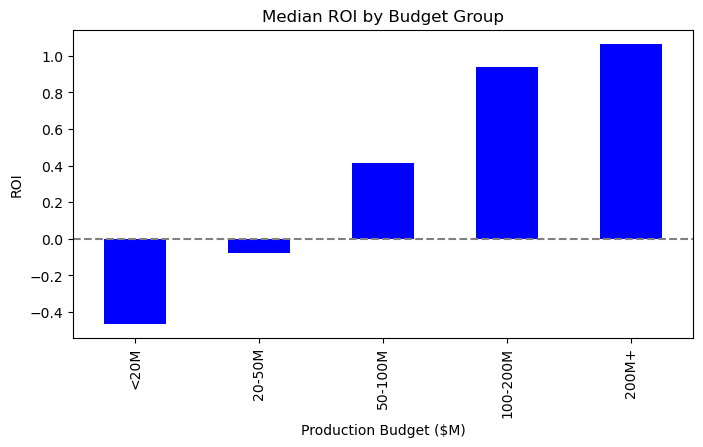

In [28]:
# Plot median ROI per budget group
plt.figure(figsize=(8,4))
final_dataset.groupby('budget_group')['roi'].median().plot(kind='bar', color="blue")
plt.title('Median ROI by Budget Group')
plt.xlabel('Production Budget ($M)')
plt.ylabel('ROI')
plt.axhline(0, color='grey', linestyle='--')
plt.show()

**Findings**:

The median ROI increases as the budget increases:
- This may be an indicator that investing more money in a film yields greater financial success
- This could because big budget films can afford better and more recognisable talent, including actors, directors, visual fx and more
- These films also may be able to spend more on marketing leading to a greater out reach

Must be noted that this **does not** necessarily mean as a general rule that "the higher the budget, the greater the ROI":
- The sample size for the >200m and <20m films is small and more susceptible to outliers
- The budgets are often linked to the genre of film, so these results could also be more representive of genre

## ROI Distribution by Runtime

Here we analyse the return on investment by the runtime of films. This is helpful as we can identify the sweet-spot of film length, which the production team can aim for.

In [29]:
# Create runtime bins
final_dataset['runtime_bin'] = pd.cut(
    final_dataset['runtime_minutes'],
    bins=[0, 90, 120, 180, np.inf],
    labels=['<90', '90-120', '120-180', '180+'])
final_dataset.groupby(['runtime_bin']).count()

,studio,domestic_gross,foreign_gross,year,clean_title,start_year,genres,averagerating,numvotes,runtime_minutes,production_budget,popularity,release_month_name,roi,profit,budget_group
runtime_bin,,,,,,,,,,,,,,,,
<90,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
90-120,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823
120-180,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
180+,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


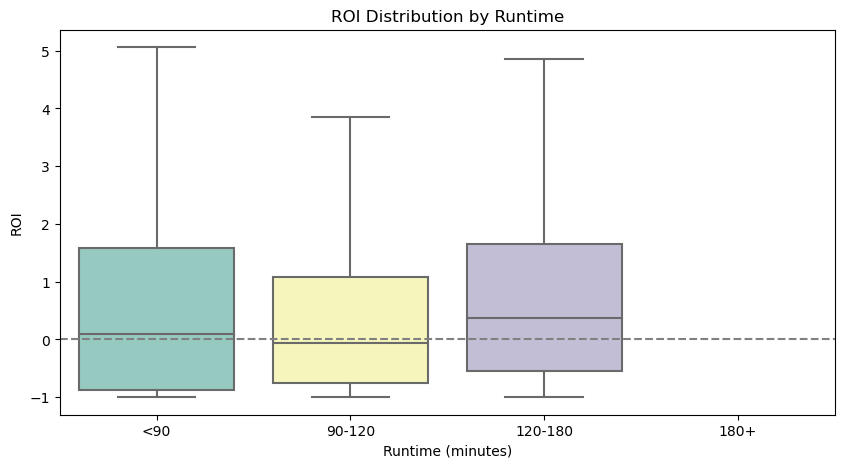

In [30]:
# Plot a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='runtime_bin',
    y='roi',
    data=final_dataset,
    showfliers=False, # Hide outliers
    palette='Set3'
)
plt.title('ROI Distribution by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('ROI')
plt.axhline(0, color='grey', linestyle='--')
plt.show();

**Findings**:

Films with a run time of 120-180 had the highest median ROI:
- This run-time bin had a fairly wide spread of data indicating high-risk of flopping and high-reward of massive hits
- These are likely blockbuster movies, due to their complex plots and (often) big budgets requiring/allowing more film time

Films with a run time of 0-90 was in the second highest median ROI:
- This is due to having the second highest median ROI
- These are likely independent films with low budgets hence not being able to create long films
- This bin also has a wide spread of data representing relatively high-risk and relatively high-reward
- This can lead to films being able to make a large ROI due to the revenue heavily outperforming the small budget but these films may also not attract any mainstream attention leading to flops

Films with a run time of 90-120 was in the lowest median ROI:
- This is due to having the lowest median ROI
- This is where most films fall **(as indicated in the histogram below)** therefore the low ROI might be due to lots of competition amongst these typical films
- These films also had a tighter spread of data indicating a greater sense of predictablity in performance
- Whilst this ranked last in median ROI it isn't necessarily a bad run time to aim for as industry standards has showcased this to be the norm

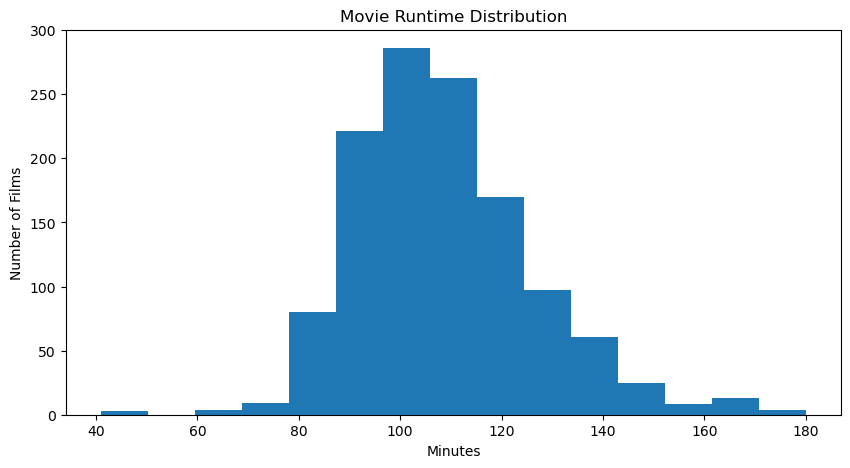

In [31]:
plt.figure(figsize=(10,5))
plt.hist(final_dataset['runtime_minutes'], bins=15)
plt.title('Movie Runtime Distribution')
plt.xlabel('Minutes')
plt.ylabel('Number of Films')
plt.show();

Note: Most films run 90-120 minutes

## Average Movie Popularity by Month

Here we analyse the average popularity of movies based on the month they were released. This is a helpful, alternative way to look at movie production outside of movie type. This can help us identify when the most and least ideal times to release movies for optimal viewrship. This can support in the logistics, marketing and overall planning of the process.

In [32]:
# Calculate average popularity by month
monthly_popularity = final_dataset.groupby(['release_month_name'])['popularity'].mean()

# Reorder by month
# Set the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Apply this order to the monthly popularity table
monthly_popularity = monthly_popularity.loc[month_order]
monthly_popularity

release_month_name
January      10.460819
February     12.545442
March        12.532635
April        11.662435
May          15.533741
June         13.845049
July         14.559651
August       12.450980
September    12.076991
October      12.951909
November     14.935367
December     13.921198
Name: popularity, dtype: float64

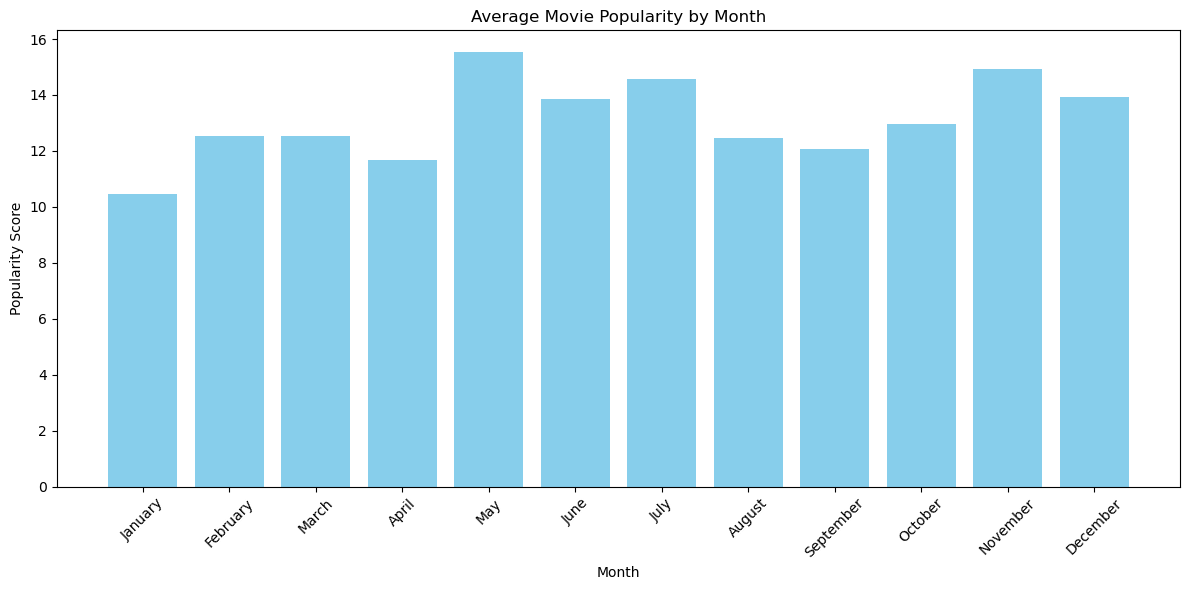

In [33]:
# Plot a bar_chart
plt.figure(figsize=(12,6))
plt.bar(monthly_popularity.index, monthly_popularity, color='skyblue')
plt.title('Average Movie Popularity by Month')
plt.xlabel('Month')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

**Findings**:

The months of May, November and July had the highest average viewership of movies:
- May and July are in and around the summer time where people may have more free time
- Similarly November is in and around the christmas holidays where people may have more time to visit cinemas with their families

January had the lowest popularity score at 10.4:
- This could be due to the financial burden of the christmas period which involves travel, partying and gift giving
- Many people are returning to work from leave and will have less leisure time as they catch up on tasks

# HYPOTHESIS TESTING :
#### 1. AVERAGE ROI BY GENRE-Test if the mean ROI differs across different genres.
#### 2. BUDGET VS ROI-Test whether production budget is correlated with ROI.
#### 3. MEDIAN ROI BY BUDGET GROUP-Test if median ROI differs across budget categories (e.g., low, medium, high).

## 1. AVERAGE ROI BY GENRE
#### Null Hypothesis (H₀):  ROI does not differ significantly across genres
#### Alternative Hypothesis (H₁):  ROI differs significantly across genres

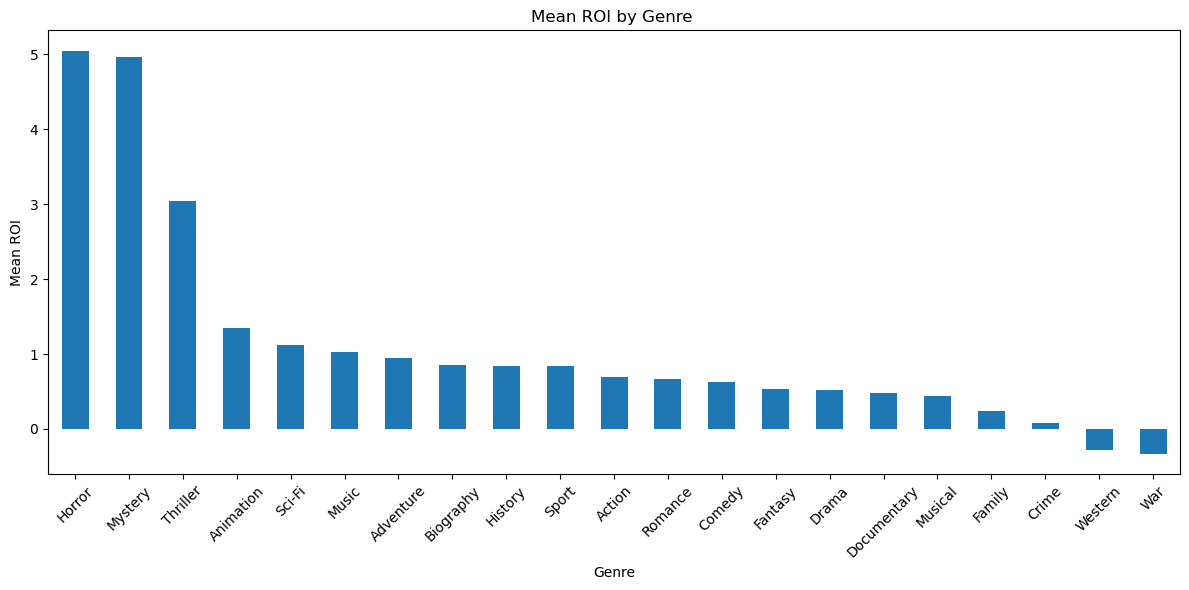

F-statistic: 5.5756
P-value: 0.0000
ROI differs significantly across genres.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Group by genre and calculate average ROI
avg_roi_by_genre = genre_split.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Plot sorted bar chart
avg_roi_by_genre.plot(kind='bar', figsize=(12, 6), title="Mean ROI by Genre ")
plt.ylabel("Mean ROI")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Prepare ROI data grouped by genre for ANOVA
roi_groups = [group['roi'].values for name, group in genre_split.groupby('genres') if len(group) > 1]

# Run one-way ANOVA test
f_stat, p_val = f_oneway(*roi_groups)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("ROI differs significantly across genres.")
else:
    print("ROI does not differ significantly across genres.")



Horror, Mystery, and Thriller are the most profitable genres, each with an average ROI above 9.0.

These genres likely do well because they have lower production costs and strong, loyal audiences.

Other genres have lower average ROI, which may mean higher costs or less audience interest.

A statistical test (ANOVA) showed a clear difference in ROI across genres (F = 7.7060, p = 0.0000).

This means that genre has a real effect on how profitable a movie can be.

## 2.  Budget VS ROI
#### Null Hypothesis (H₀): Higher budget films ( > \\$50M) and lower budget films (≤\\$50M) have the same chance of being profitable (ROI > 1).
#### Alternative Hypothesis (H₁): Higher budget films are more likely to be profitable.


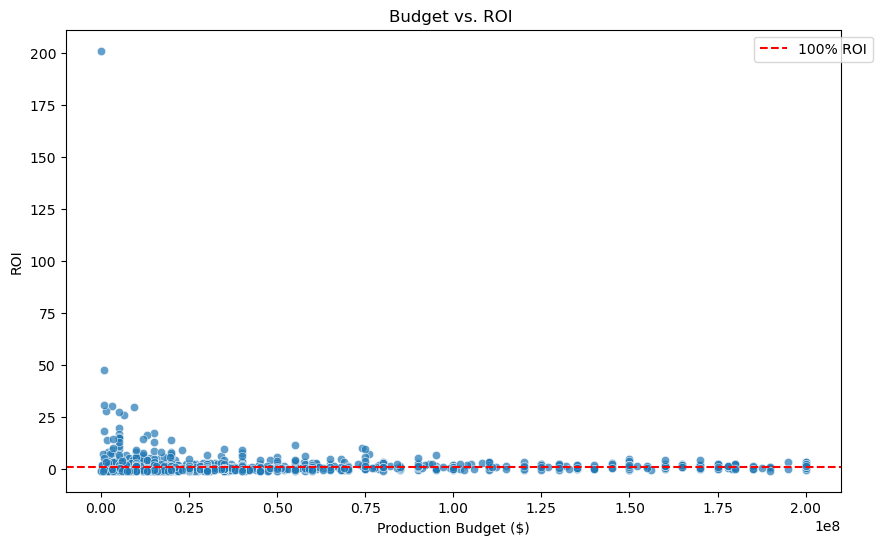

Low-budget success rate: 25.3%
Medium_budget success rate: 29.9%
High-budget success rate: 28.5%

Statistical Conclusion: FAIL TO REJECT the null hypothesis (p ≥ 0.05)
Higher budget films (>$50M) and lower budget films (≤$50M) have the same chance of being profitable (ROI > 1)


In [38]:
# Budget vs. ROI
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='production_budget', 
    y='roi', 
    data=final_dataset[final_dataset['production_budget'] <= 200e6],  # Filter outliers
    alpha=0.7
)
plt.axhline(y=1, color='red', linestyle='--', label='100% ROI')
plt.title("Budget vs. ROI ")
plt.xlabel("Production Budget ($)")
plt.ylabel("ROI")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
from statsmodels.stats.proportion import proportions_ztest



# Creating budget groups
low_budget = final_dataset[final_dataset['production_budget'] <= 50e6]
medium_budget = final_dataset[(final_dataset['production_budget'] > 50e6) & (final_dataset['production_budget'] <= 100e6)]
high_budget = final_dataset[(final_dataset['production_budget'] > 10e6) & (final_dataset['production_budget'] <= 200e6)]

# Count profitable films
profitable_low = (low_budget['roi'] > 1).sum()
profitable_medium = (medium_budget['roi'] > 1).sum()
profitable_high = (high_budget['roi'] > 1).sum()

# Run z-test
zstat, pval = proportions_ztest(
    [profitable_high, profitable_low],
    [len(high_budget), len(low_budget)],
    alternative='larger'
)

# Output
print(f"Low-budget success rate: {profitable_low/len(low_budget):.1%}")
print(f"Medium_budget success rate: {profitable_medium/len(medium_budget):.1%}")
print(f"High-budget success rate: {profitable_high/len(high_budget):.1%}")
print(f"\nStatistical Conclusion: {'REJECT the null hypothesis (p < 0.05)' if pval < 0.05 else 'FAIL TO REJECT the null hypothesis (p ≥ 0.05)'}")
print("Higher budget films (>$50M) and lower budget films (≤$50M) have the same chance of being profitable (ROI > 1)")

There's no statistically significant difference in profitability between budget 

### 3. MEDIAN ROI BY BUDGET GROUP
#### Null Hypothesis: All budget groups have the same median ROI
#### Alternative Hypothesis: At least one group differs

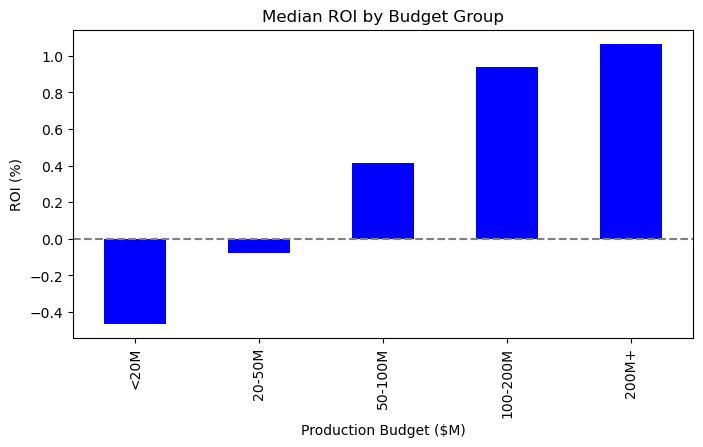

Null Hypothesis: All budget groups have the same median ROI
Alternative Hypothesis: At least one group differs

ANOVA Results: F = 2.1, p = 0.084
No significant differences between groups


In [39]:
# Your original visualization code 
import matplotlib.pyplot as plt
import seaborn as sns

# Create budget groups
bins = [0, 20, 50, 100, 200, 500]
final_dataset['budget_group'] = pd.cut(final_dataset['production_budget']/1e6, 
                                    bins=bins, 
                                    labels=['<20M', '20-50M', '50-100M', '100-200M', '200M+'])

# Plot median ROI per budget group
plt.figure(figsize=(8,4))
final_dataset.groupby('budget_group')['roi'].median().plot(kind='bar', color="blue")
plt.title('Median ROI by Budget Group')
plt.xlabel('Production Budget ($M)')
plt.ylabel('ROI (%)')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

from scipy.stats import f_oneway

# State our hypothesis
print("Null Hypothesis: All budget groups have the same median ROI")
print("Alternative Hypothesis: At least one group differs\n")

# Prepare the data
group_data = []
for group in ['<20M', '20-50M', '50-100M', '100-200M', '200M+']:
    if group in final_dataset['budget_group'].unique():
        group_data.append(final_dataset[final_dataset['budget_group'] == group]['roi'])

# Run the test (ANOVA)
if len(group_data) >= 2:  # Need at least 2 groups to compare
    f_stat, p_value = f_oneway(*group_data)
    print(f"ANOVA Results: F = {f_stat:.1f}, p = {p_value:.3f}")
    
    # Interpret
    if p_value < 0.05:
        best_group = final_dataset.groupby('budget_group')['roi'].median().idxmax()
        print(f"Significant difference found! Best group: {best_group}")
    else:
        print("No significant differences between groups")
else:
    print("Not enough groups to compare")

# CONCLUSIONS

#### Genres
High ROI: Horror, mystery and thriller movies yielded the highest ROI. This showcased that these types of films  are likely to make profits even with lower budgets. The hypothesis testing confirmed that genres had influence in contributing to the ROI.

Popularity: Adventure, action, and sci-fi were the most popular genres, though not necessarily yielding the highest ROI. Nevertheless, this is an important aspect to consider as viewership is important in attracting people to the platform for future original content produced. 

#### Budgets
The higher the budget the higher the ROI yielded. However, this is to be taken with a lot of scrutiny as the hypothesis testing didn't find this to be necessarily be a statistically significant aspect.

#### Best time to release
Movies released in May, November and July performed the best in terms of viewership.

# RECOMMENDATIONS
#### Genres
In instances where the priority is **short-term** commercial success; horror, mystery and thriller movies should be the main genres produced. This is because they are most likely earn the investment back from that specific project.

In instances where the priority is **long-term** commercial success; adventure, action, and sci-fi movies should be the main genres produced. This is because they are most popular genres (in terms of viewership), meaning they will attract consumers to the platform. This can create familiarity with the platform and lead to consumer loyalty.

#### Budgets
The more you're willing to invest, the more you can hope to earn in ROI. But this is to be taken with careful consideration.

#### Best time to release
The production team should aim to release their films in May, November and July.


# NEXT STEPS

Analyse regional trends to guide location-based marketing.

Build a simple model to predict ROI based on budget, genre, and release date.

Investigate marketing spend data if available, to link promotion and success.
